In [18]:
## Importing everything together to save time

import pandas as pd 
import numpy as np
import matplotlib as mp
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
## %matplotlib notebook

Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
EDVisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
Merged = pd.merge(Patients, Discharges, on="PatientID")
Merged1= pd.merge(Patients, ReAdmissionRegistry, on="PatientID", how="left")

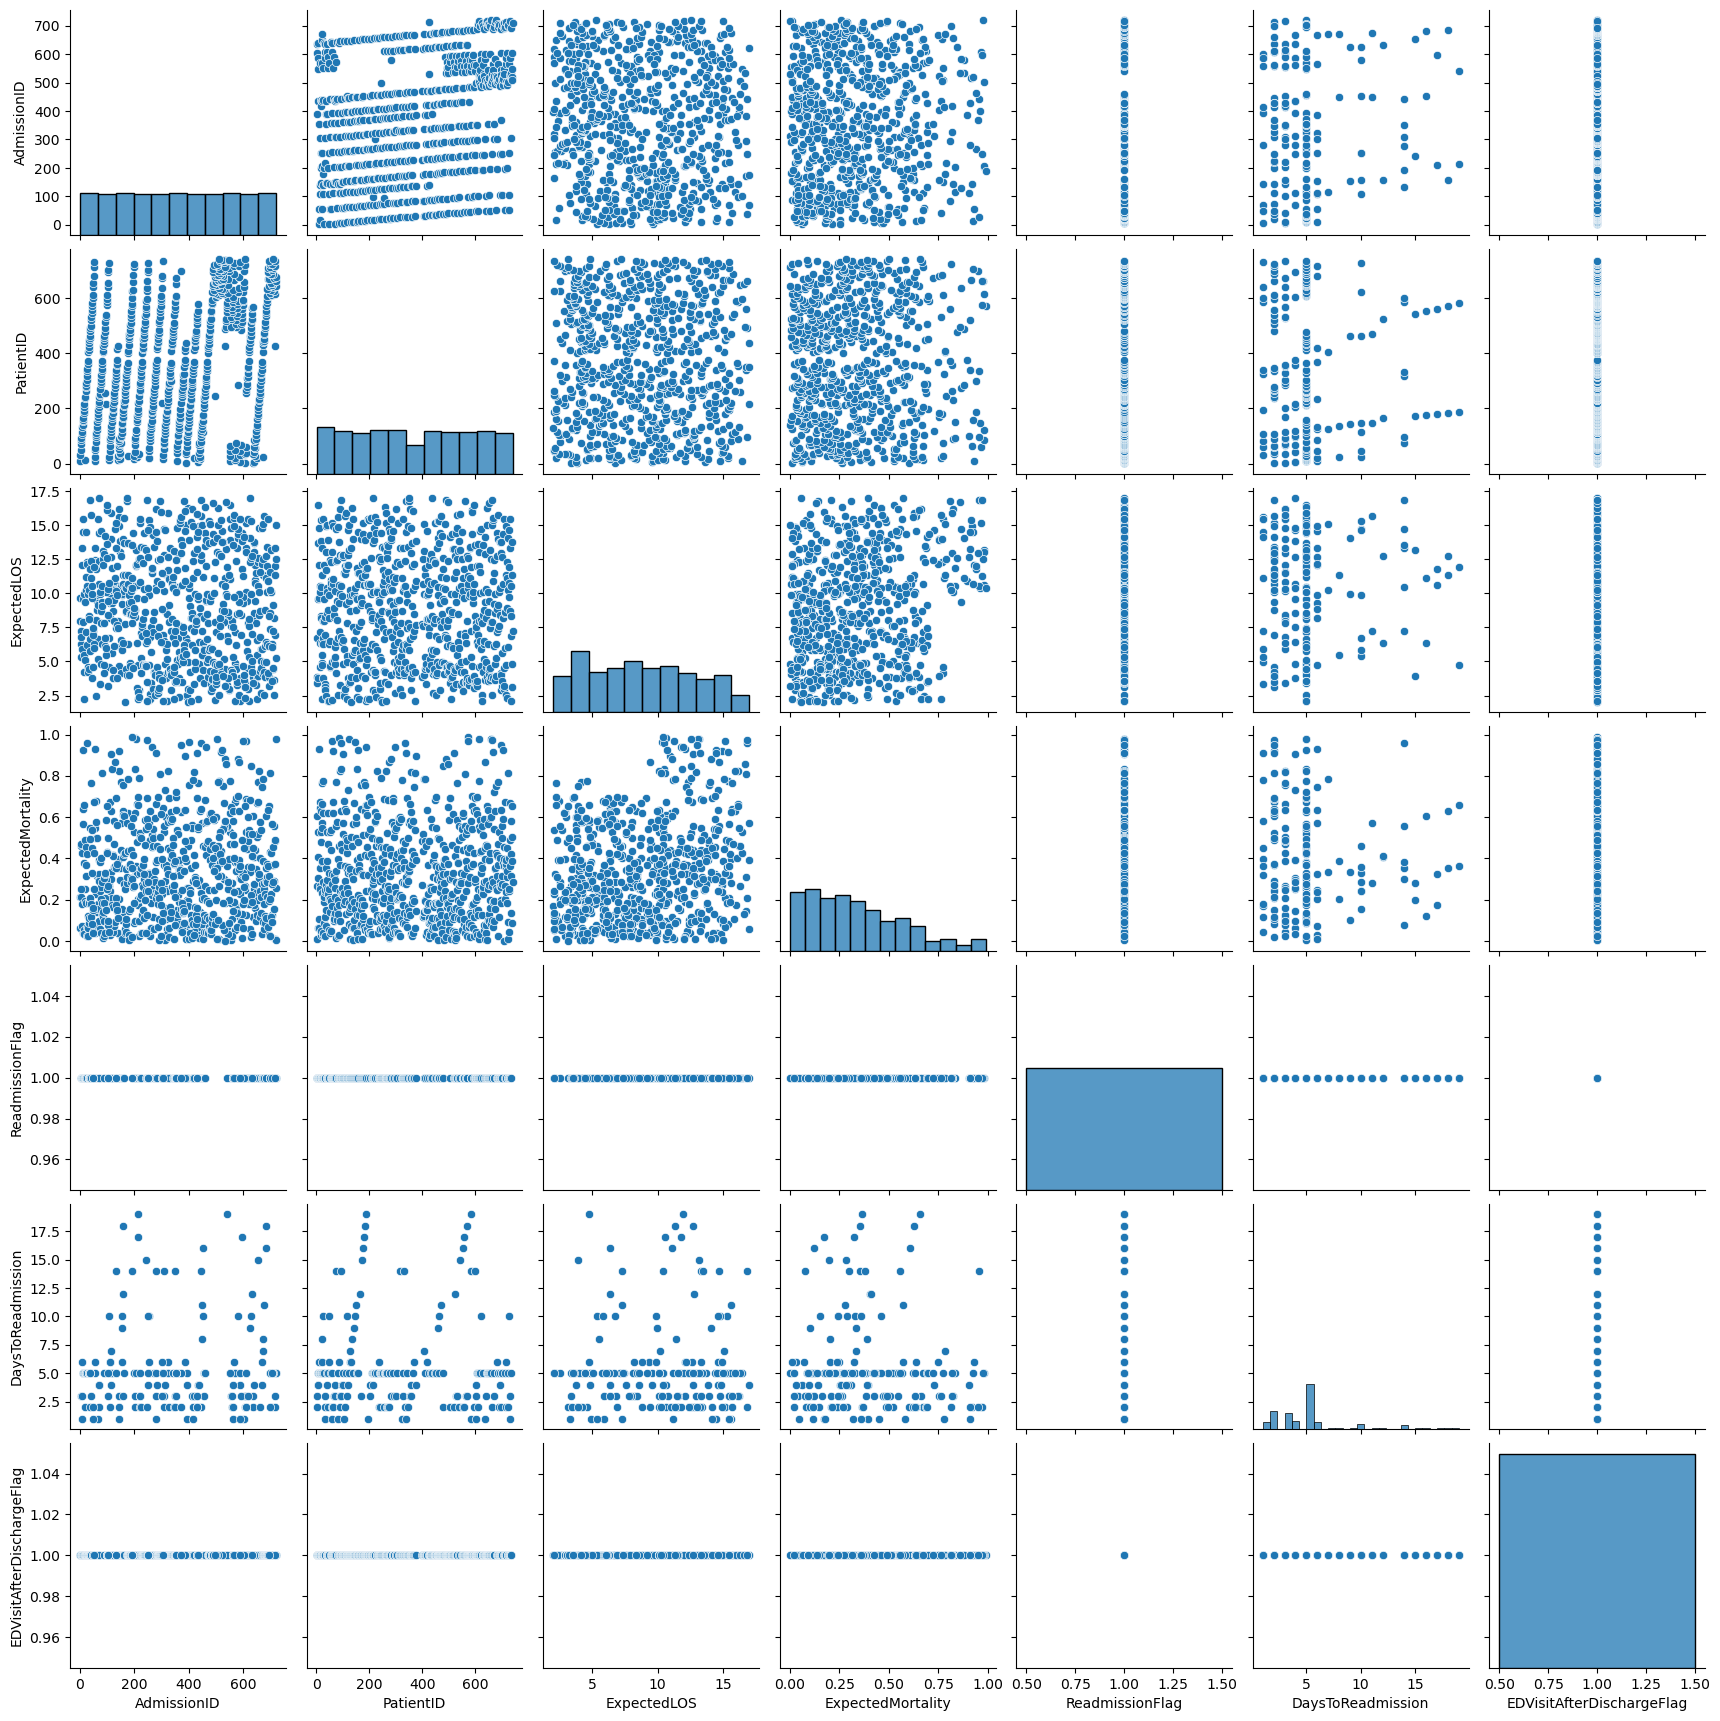

In [19]:
## Q1. Make a pair plot on Readmission Registry table 
## & do u see any correlation between columns values.

sns.pairplot(ReAdmissionRegistry)

In [23]:
## Q2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

Patients.iloc[101:201,1:3]

FirstName    LastName
101     Gipsy    Frankton
102    Jethro      Wharin
103       Viv     Aylward
104     Swift   Dreschler
105     Fadel  Jacquemard
..        ...         ...
196      Noam    Laguerre
197      Arie     Bayless
198    Janaye     O'Mohun
199      Fonz       Group
200  Cummings      Pickup

[100 rows x 2 columns]

In [48]:
## Q5. Display full name of patients who are born in 1986.

df = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols = ["FirstName","LastName","DateOfBirth"])
df['FullName'] = df['FirstName'] + ' ' + df["LastName"]
df["DateOfBirthYear"] = pd.to_datetime(df["DateOfBirth"]).dt.year
df[df["DateOfBirthYear"] == 1986]

FirstName    LastName             DateOfBirth             FullName  \
23     Gabriel       Joseph 1986-05-31 09:36:05.716      Gabriel  Joseph   
24     Lincoln       Brenda 1986-07-24 17:36:00.791      Lincoln  Brenda   
29          Ala     Halpert 1986-11-26 10:44:22.628          Ala Halpert   
72       Lolita       Darci 1986-01-08 02:34:04.596         Lolita Darci   
164       Fadel    Bernardt 1986-05-29 00:35:58.694       Fadel Bernardt   
238     Bentley      Kippax 1986-02-11 06:22:40.734       Bentley Kippax   
367        Vale      Olanda 1986-04-15 00:49:58.690          Vale Olanda   
373       Britt     Dureden 1986-11-19 23:50:47.955        Britt Dureden   
386   Cristabel      Chatel 1986-07-10 16:27:30.640     Cristabel Chatel   
415  Constantia       Group 1986-03-26 06:37:22.525     Constantia Group   
452      Morgan   Scrowston 1986-12-19 21:34:24.472     Morgan Scrowston   
561         Dom      Baglow 1986-07-26 14:43:49.240           Dom Baglow   
568     Ignazio     Melling 1986-12-25 03:40:43.884      Ignazio Melling   
595    Homenick       Rings 1986-02-24 15:08:30.404       Homenick Rings   
639      Hashim       Slark 1986-10-13 10:40:43.596         Hashim Slark   
643       Ellie  Ramsbotham 1986-05-21 16:35:52.711     Ellie Ramsbotham   
674   Llewellyn       Group 1986-11-09 17:15:11.196      Llewellyn Group   
714       Niles        Shaw 1986-12-15 06:31:44.358           Niles Shaw   
733      Yvette         Inc 1986-11-23 02:32:12.587           Yvette Inc   
777     Siouxie       Group 1986-04-28 03:25:01.182        Siouxie Group   
852       Carly       Group 1986-11-21 02:44:49.632          Carly Group   
868       Worth   Pickering 1986-12-22 08:21:02.691      Worth Pickering   
877        Arni     Baldack 1986-04-10 13:18:15.354         Arni Baldack   
909     Kuvalis    Coupland 1986-05-23 19:23:27.752     Kuvalis Coupland   
922    Rebbecca  Rollingson 1986-09-29 11:58:56.983  Rebbecca Rollingson   
940         Wat     Fideler 1986-05-26 00:01:19.761          Wat Fideler   

     DateOfBirthYear  
23              1986  
24              1986  
29              1986  
72              1986  
164             1986  
238             1986  
367             1986  
373             1986  
386             1986  
415             1986  
452             1986  
561             1986  
568             1986  
595             1986  
639             1986  
643             1986  
674             1986  
714             1986  
733             1986  
777             1986  
852             1986  
868             1986  
877             1986  
909             1986  
922             1986  
940             1986

In [49]:
## 18 Add column 'Age' in Patient table.

df = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols = ["FirstName","LastName","DateOfBirth"])
df["Age"] = (pd.to_datetime("today").year-pd.to_datetime(df["DateOfBirth"]).dt.year)
df.head(945)

FirstName  LastName             DateOfBirth  Age
0       Lanni       Sue 1960-01-01 00:00:00.000   63
1         Far     Myers 1985-11-15 02:08:42.090   38
2     Devlin    Michael 1976-04-15 02:52:09.762   47
3     Carmine     Texas 1968-10-15 03:32:13.635   55
4       Tann       Bama 1962-05-01 19:12:58.950   61
..        ...       ...                     ...  ...
940       Wat   Fideler 1986-05-26 00:01:19.761   37
941    Wandie  Baythrop 1970-06-10 21:41:03.814   53
942   Diahann   Smeeton 1983-01-08 21:49:27.884   40
943  Panchito   Sharple 1963-06-05 07:57:05.569   60
944     Walsh    Calvie 1972-08-06 03:40:03.454   51

[945 rows x 4 columns]

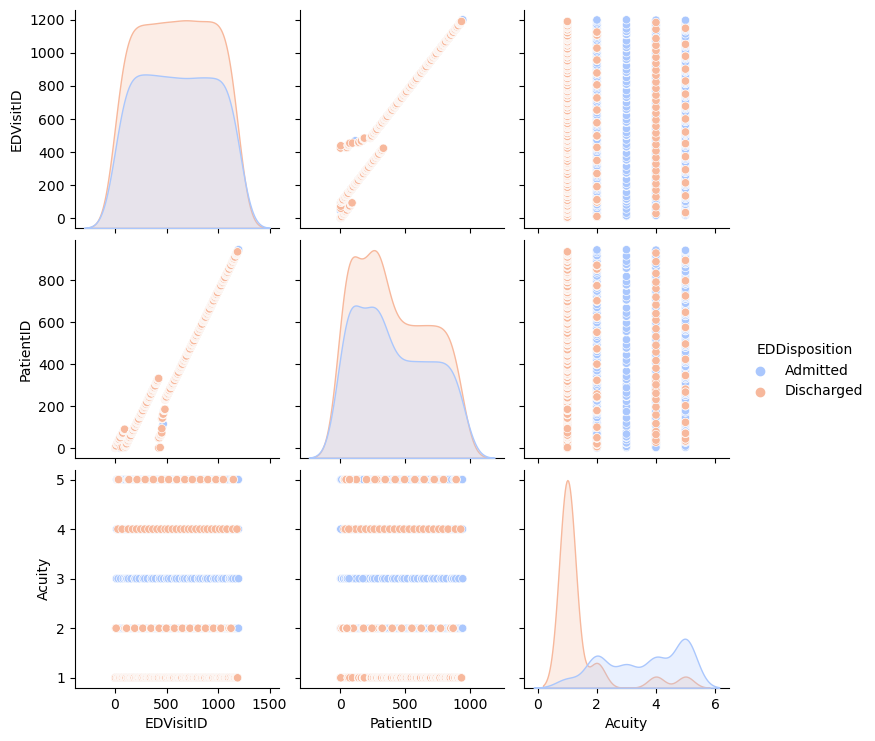

In [85]:
## Q7. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

sns.pairplot(EDVisits,hue='EDDisposition',palette='coolwarm')

Text(0.5, 1.0, 'Primary Diagnosis and Expected Length of Stay in Patients')

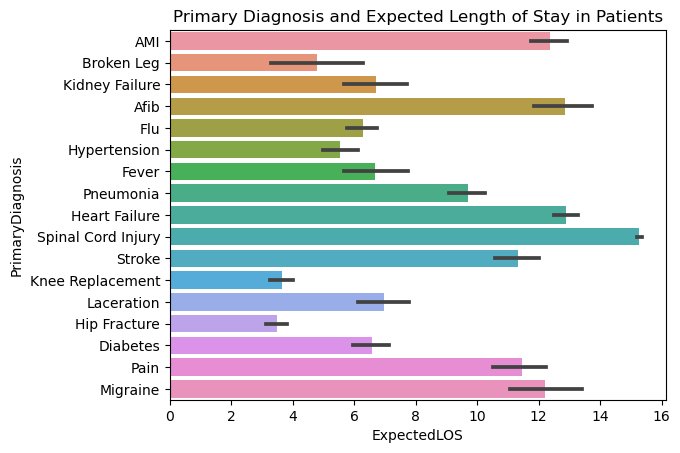

In [79]:
## Q8. Create a bar chart between expectedLOS & Primary diagnosis.

sns.barplot(x='ExpectedLOS',y='PrimaryDiagnosis',data=df)
plt.title("Primary Diagnosis and Expected Length of Stay in Patients")

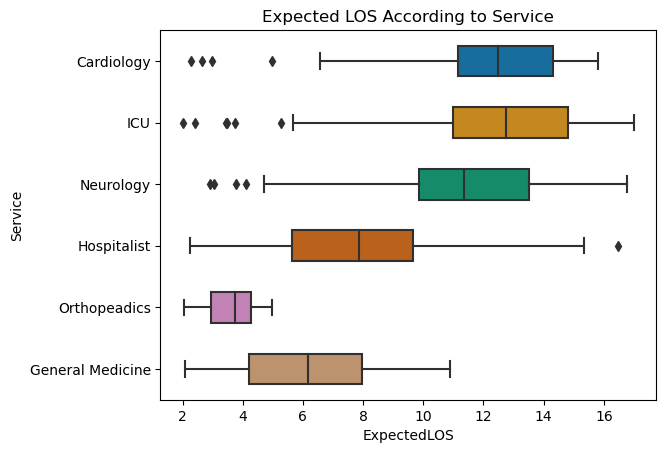

In [84]:
## Q10. Create a boxplot on ExpectedLOS by taking service into account.

sns.boxplot(y='Service', x='ExpectedLOS', 
                 data=Discharges,
                 width=0.5,
                 palette="colorblind")
plt.title("Expected LOS According to Service")
plt.xlabel("ExpectedLOS")
plt.ylabel("Service")
plt.show()

In [67]:
## Q21. Which demographic patients are prone to get stroke?

Demographic1 = Merged['Race'].where(Merged['PrimaryDiagnosis']=='Stroke').dropna().max()
Demographic2 = Merged['Language'].where(Merged['PrimaryDiagnosis']=='Stroke').dropna().max()
Demographic3 = Merged['Gender'].where(Merged['PrimaryDiagnosis']=='Stroke').dropna().max()
print('Race having maximum stroke patients: ',Demographic1)
print('Language having maximum stroke patients: ',Demographic2)
print('Gender having maximum stroke patients: ',Demographic3)


Race having maximum stroke patients:  White
Language having maximum stroke patients:  Spanish
Gender having maximum stroke patients:  Male


In [80]:
## Q29. Calculate average LOS.

Discharges["ExpectedLOS"].mean()

8.82458915915616